In [15]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline 

In [124]:
train_df = pd.read_csv('../project1/dss-regression-datasets/project-toyotacorolla-data/train.csv')

In [3]:
#데이터 확인
train_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
3,11,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,8,2002,31461,Petrol,192,0,...,1,1,0,0,0,0,1,0,0,0
4,13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,19600,25,8,2002,32189,Petrol,192,0,...,1,1,0,1,1,1,1,0,0,0


In [16]:
#train_df.describe()
pd.DataFrame.describe(train_df[['Price','Age_08_04','KM','CC','HP','Weight']])

,Price,Age_08_04,KM,CC,HP,Weight
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,10738.358194,56.041217,68177.927380,1579.582924,101.479882,1072.262022
std,3614.987568,18.615283,37966.031948,488.566949,14.811333,51.356826
min,4350.000000,1.000000,1.000000,1300.000000,69.000000,1000.000000
25%,8400.000000,44.000000,41567.500000,1400.000000,86.000000,1040.000000
50%,9850.000000,61.000000,62280.000000,1600.000000,110.000000,1070.000000
75%,11950.000000,70.000000,86467.500000,1600.000000,110.000000,1085.000000
max,31000.000000,80.000000,243000.000000,16000.000000,192.000000,1615.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 39 columns):
Id                   1019 non-null int64
Model                1019 non-null object
Price                1019 non-null int64
Age_08_04            1019 non-null int64
Mfg_Month            1019 non-null int64
Mfg_Year             1019 non-null int64
KM                   1019 non-null int64
Fuel_Type            1019 non-null object
HP                   1019 non-null int64
Met_Color            1019 non-null int64
Color                1019 non-null object
Automatic            1019 non-null int64
CC                   1019 non-null int64
Doors                1019 non-null int64
Cylinders            1019 non-null int64
Gears                1019 non-null int64
Quarterly_Tax        1019 non-null int64
Weight               1019 non-null int64
Mfr_Guarantee        1019 non-null int64
BOVAG_Guarantee      1019 non-null int64
Guarantee_Period     1019 non-null int64
ABS                  1019 non

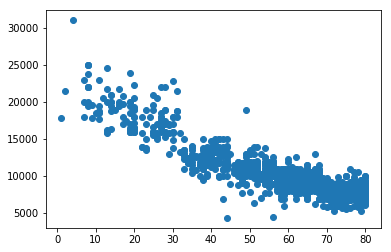

In [101]:
plt.figure()
plt.scatter(train_df["Age_08_04"], train_df["Price"])
plt.show()

In [164]:
#그룹핑
year_group = train_df.groupby('Mfg_Year')
print(len(year_group.groups))
year_group.groups


7


{1998: Int64Index([ 739,  740,  741,  742,  743,  744,  745,  746,  747,  748,
             ...
             1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018],
            dtype='int64', length=280),
 1999: Int64Index([423, 424, 425, 426, 427, 428, 429, 430, 431, 432,
             ...
             729, 730, 731, 732, 733, 734, 735, 736, 737, 738],
            dtype='int64', length=316),
 2000: Int64Index([268, 269, 270, 271, 272, 273, 274, 275, 276, 277,
             ...
             413, 414, 415, 416, 417, 418, 419, 420, 421, 422],
            dtype='int64', length=155),
 2001: Int64Index([134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
             ...
             258, 259, 260, 261, 262, 263, 264, 265, 266, 267],
            dtype='int64', length=134),
 2002: Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43,

In [163]:
#그룹별 가격 평균
year_group.size()

print(train_df.groupby('Mfg_Year')["Price"].mean())
print('----------------------------')
print(train_df.groupby('Mfg_Month')["Price"].mean())
print('----------------------------')
print(train_df.groupby('Color')["Price"].mean())
print('----------------------------')
print(train_df.groupby('CC')["Price"].mean())
print('----------------------------')
print(train_df.groupby('Fuel_Type')["Price"].mean())


#plt.bar(train_df.groupby('Mfg_Year')["Price"].mean())
#plt.show()

Mfg_Year
1998     7912.639286
1999     9327.816456
2000    10788.380645
2001    12342.537313
2002    16990.491525
2003    18594.750000
2004    22335.666667
Name: Price, dtype: float64
----------------------------
Mfg_Month
1     11012.566667
2     11488.404255
3     10217.340000
4     10144.714286
5     11203.181818
6     10652.573034
7     11119.892473
8     11011.179775
9      9885.306122
10    10638.539474
11    10128.488372
12    10398.255814
Name: Price, dtype: float64
----------------------------
Color
Beige      8933.333333
Black     11349.431818
Blue      10800.291262
Green      9980.060403
Grey      11774.299517
Red        9886.323671
Silver    11240.377778
Violet     9950.000000
White      7830.714286
Yellow    12922.500000
Name: Price, dtype: float64
----------------------------
CC
1300      8459.435028
1332      8800.000000
1398      8950.000000
1400     12905.210526
1587      8450.000000
1598     19850.000000
1600     10807.299342
1800     17944.444444
1900     10629.31818

In [162]:
#년도별 월별 가격 평균
print(train_df.groupby(['Mfg_Year', 'Mfg_Month'])["Price"].mean())

Mfg_Year  Mfg_Month
1998      1             7898.500000
          2             8072.954545
          3             7736.363636
          4             8180.625000
          5             7895.625000
          6             7877.592593
          7             7722.631579
          8             7971.153846
          9             7434.615385
          10            8016.416667
          11            8084.230769
          12            8003.333333
1999      1             9041.923077
          2             9333.478261
          3             9214.250000
          4             9182.551020
          5             9028.571429
          6             9456.304348
          7             9551.166667
          8             9553.392857
          9             9933.333333
          10            9170.952381
          11            9320.588235
          12            9824.642857
2000      1            10582.142857
          2            10180.312500
          3            10636.538462
        

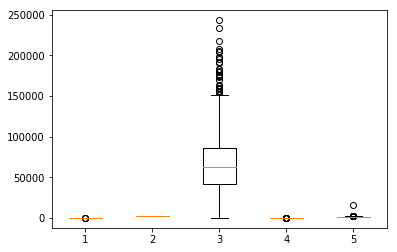

In [26]:
#박스플롯
plt.figure()
plt.subplot(231)
plt.boxplot((train_df["Age_08_04"],train_df["Mfg_Year"],train_df["KM"], train_df["HP"],train_df["CC"]))
plt.show()

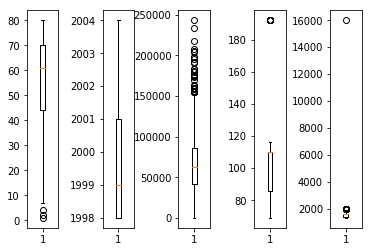

In [34]:
#박스플롯
plt.subplot(191)
plt.boxplot((train_df["Age_08_04"]))
plt.subplot(193)
plt.boxplot((train_df["Mfg_Year"]))
plt.subplot(195)
plt.boxplot((train_df["KM"]))
plt.subplot(197)
plt.boxplot((train_df["HP"]))
plt.subplot(199)
plt.boxplot((train_df["CC"]))
plt.show()

In [142]:
#연속형 데이터 범주형으로 나누기
train_df['range_age'] = np.where(train_df['Age_08_04'] > 70, '70',\
                                 np.where(train_df['Age_08_04'] > 60, '60', \
                                          np.where(train_df['Age_08_04'] > 50, '50', \
                                                   np.where(train_df['Age_08_04'] > 40, '40', \
                                                            np.where(train_df['Age_08_04'] > 30, '30', \
                                                                     np.where(train_df['Age_08_04'] > 20, '20', \
                                                                              np.where(train_df['Age_08_04'] > 10, '10', '1')))))))
train_df2 = train_df.copy()
train_df2_1 = train_df2[train_df2['range_age'] == '1']
train_df2_10 = train_df2[train_df2['range_age'] == '10']
train_df2_20 = train_df2[train_df2['range_age'] == '20']
train_df2_30 = train_df2[train_df2['range_age'] == '30']
train_df2_40 = train_df2[train_df2['range_age'] == '40']
train_df2_50 = train_df2[train_df2['range_age'] == '50']
train_df2_60 = train_df2[train_df2['range_age'] == '60']
train_df2_70 = train_df2[train_df2['range_age'] == '70']




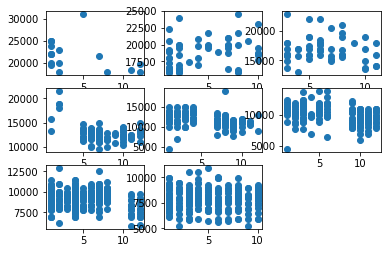

In [153]:
plt.subplot(3, 3, 1)
plt.scatter(train_df2_1["Mfg_Month"], train_df2_1["Price"])
plt.subplot(3, 3, 2)
plt.scatter(train_df2_10["Mfg_Month"], train_df2_10["Price"])
plt.subplot(3, 3, 3)
plt.scatter(train_df2_20["Mfg_Month"], train_df2_20["Price"])
plt.subplot(3, 3, 4)
plt.scatter(train_df2_30["Mfg_Month"], train_df2_30["Price"])
plt.subplot(3, 3, 5)
plt.scatter(train_df2_40["Mfg_Month"], train_df2_40["Price"])
plt.subplot(3, 3, 6)
plt.scatter(train_df2_50["Mfg_Month"], train_df2_50["Price"])
plt.subplot(3, 3, 7)
plt.scatter(train_df2_60["Mfg_Month"], train_df2_60["Price"])
plt.subplot(3, 3, 8)
plt.scatter(train_df2_70["Mfg_Month"], train_df2_70["Price"])

plt.show()

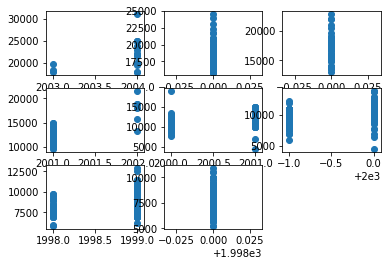

In [155]:
plt.subplot(3, 3, 1)
plt.scatter(train_df2_1["Mfg_Year"], train_df2_1["Price"])
plt.subplot(3, 3, 2)
plt.scatter(train_df2_10["Mfg_Year"], train_df2_10["Price"])
plt.subplot(3, 3, 3)
plt.scatter(train_df2_20["Mfg_Year"], train_df2_20["Price"])
plt.subplot(3, 3, 4)
plt.scatter(train_df2_30["Mfg_Year"], train_df2_30["Price"])
plt.subplot(3, 3, 5)
plt.scatter(train_df2_40["Mfg_Year"], train_df2_40["Price"])
plt.subplot(3, 3, 6)
plt.scatter(train_df2_50["Mfg_Year"], train_df2_50["Price"])
plt.subplot(3, 3, 7)
plt.scatter(train_df2_60["Mfg_Year"], train_df2_60["Price"])
plt.subplot(3, 3, 8)
plt.scatter(train_df2_70["Mfg_Year"], train_df2_70["Price"])

plt.show()

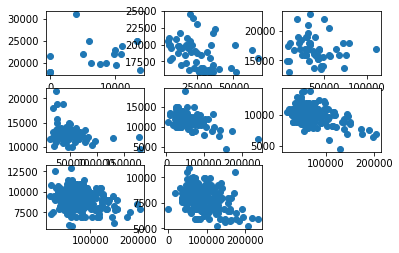

In [156]:
plt.subplot(3, 3, 1)
plt.scatter(train_df2_1["KM"], train_df2_1["Price"])
plt.subplot(3, 3, 2)
plt.scatter(train_df2_10["KM"], train_df2_10["Price"])
plt.subplot(3, 3, 3)
plt.scatter(train_df2_20["KM"], train_df2_20["Price"])
plt.subplot(3, 3, 4)
plt.scatter(train_df2_30["KM"], train_df2_30["Price"])
plt.subplot(3, 3, 5)
plt.scatter(train_df2_40["KM"], train_df2_40["Price"])
plt.subplot(3, 3, 6)
plt.scatter(train_df2_50["KM"], train_df2_50["Price"])
plt.subplot(3, 3, 7)
plt.scatter(train_df2_60["KM"], train_df2_60["Price"])
plt.subplot(3, 3, 8)
plt.scatter(train_df2_70["KM"], train_df2_70["Price"])

plt.show()

ValueError: could not convert string to float: 'Petrol'

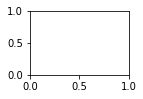

In [161]:
#error
plt.subplot(3, 3, 1)
plt.plot(train_df2_1["Fuel_Type"], train_df2_1["Price"])
plt.subplot(3, 3, 2)
plt.plot(train_df2_10["Fuel_Type"], train_df2_10["Price"])
plt.subplot(3, 3, 3)
plt.plot(train_df2_20["Fuel_Type"], train_df2_20["Price"])
plt.subplot(3, 3, 4)
plt.plot(train_df2_30["Fuel_Type"], train_df2_30["Price"])
plt.subplot(3, 3, 5)
plt.plot(train_df2_40["Fuel_Type"], train_df2_40["Price"])
plt.subplot(3, 3, 6)
plt.plot(train_df2_50["Fuel_Type"], train_df2_50["Price"])
plt.subplot(3, 3, 7)
plt.plot(train_df2_60["Fuel_Type"], train_df2_60["Price"])
plt.subplot(3, 3, 8)
plt.plot(train_df2_70["Fuel_Type"], train_df2_70["Price"])

plt.show()